# Heart Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

load dataset

In [2]:
df = pd.read_csv("data/heart.csv")

## Helper Function

In [3]:
def data_type_analysis(df, ignore_complete_columns = False):
    results = []
    # Analyze each column with missing values
    for column in df.columns:
        col_data = df[column]
        nan_count = col_data.isna().sum()
        prop_missing = nan_count / len(df)
        # Only process columns with missing values
        if nan_count > 0 or not ignore_complete_columns:
            unique_values = col_data.nunique(dropna=True)
            non_na_data = col_data.dropna()
            
            if pd.api.types.is_integer_dtype(non_na_data):
                col_type = "Integer"
            elif pd.api.types.is_float_dtype(non_na_data):
                # Check if all values are whole numbers
                if (non_na_data % 1 == 0).all():
                    col_type = "Integer"
                else:
                    col_type = "Float"
            elif pd.api.types.is_string_dtype(non_na_data):
                col_type = "String"
            else:
                col_type = "Other"
            
            # Append results to the list
            results.append({
                "Column": column,
                "Type": col_type,
                "Unique Values": unique_values,
                "NaN Count": nan_count,
                "Proportion Missing": prop_missing,
            })
    # Convert the list of results into a DataFrame
    analysis_df = pd.DataFrame(results)
    return analysis_df

## Cleaning

In [4]:
temp = data_type_analysis(df)
discrete_summary = temp[temp['Unique Values'] <= 4]
discrete_summary

,Column,Type,Unique Values,NaN Count,Proportion Missing
1,Sex,String,2,0,0.0
2,ChestPainType,String,4,0,0.0
5,FastingBS,Integer,2,0,0.0
6,RestingECG,String,3,0,0.0
8,ExerciseAngina,String,2,0,0.0
10,ST_Slope,String,3,0,0.0
11,HeartDisease,Integer,2,0,0.0


In [5]:
conti_summary = temp[temp['Unique Values'] > 4]
conti_summary

,Column,Type,Unique Values,NaN Count,Proportion Missing
0,Age,Integer,50,0,0.0
3,RestingBP,Integer,67,0,0.0
4,Cholesterol,Integer,222,0,0.0
7,MaxHR,Integer,119,0,0.0
9,Oldpeak,Float,53,0,0.0


Sumarize Data

In [6]:
temp = data_type_analysis(df)
print("Entier Summary")
print(temp)
temp1 = temp[(temp['Type']=="String")]
print("String Data")
print(temp1)

Entier Summary
            Column     Type  Unique Values  NaN Count  Proportion Missing
0              Age  Integer             50          0                 0.0
1              Sex   String              2          0                 0.0
2    ChestPainType   String              4          0                 0.0
3        RestingBP  Integer             67          0                 0.0
4      Cholesterol  Integer            222          0                 0.0
5        FastingBS  Integer              2          0                 0.0
6       RestingECG   String              3          0                 0.0
7            MaxHR  Integer            119          0                 0.0
8   ExerciseAngina   String              2          0                 0.0
9          Oldpeak    Float             53          0                 0.0
10        ST_Slope   String              3          0                 0.0
11    HeartDisease  Integer              2          0                 0.0
String Data
           

In [7]:
binary_columns = list(temp1[temp1["Unique Values"] == 2]["Column"])
mulit_cat_columns = list(temp1[temp1["Unique Values"] > 2]["Column"])
# print(binary_columns)
# print(mulit_cat_columns)
nominal_columns = mulit_cat_columns[:-1]
ordinal_column = mulit_cat_columns[-1]
print("Binary")
print(binary_columns)
print("nominal columns:")
print(nominal_columns)
print("ordinal column:")
print(ordinal_column)

# df[ordinal_column].unique()

Binary
['Sex', 'ExerciseAngina']
nominal columns:
['ChestPainType', 'RestingECG']
ordinal column:
ST_Slope


### Handel Categorical Variables
Turn nominal columns to one hot encoding, Turn ordinal column to integer values

In [8]:
# Convert each binary column to 0 and 1
for col in binary_columns:
    unique_values = df[col].unique()
    df[col] = df[col].map({unique_values[0]: 0, unique_values[1]: 1})
    print(unique_values)

# Convert nominal columns to be one hot encoding
df = pd.get_dummies(df, columns=nominal_columns,dtype=int)

# Convert Ordinal Column To Integer
unique_values = df[ordinal_column].unique()
value_to_binary = {val: idx for idx, val in enumerate(unique_values)}  # Generalized dictionary
df[ordinal_column] = df[ordinal_column].map(value_to_binary)

['M' 'F']
['N' 'Y']


Summary

In [ ]:
summary = data_type_analysis(df)
summary

,Column,Type,Unique Values,NaN Count,Proportion Missing
0,Age,Integer,50,0,0.0
1,Sex,Integer,2,0,0.0
2,RestingBP,Integer,67,0,0.0
3,Cholesterol,Integer,222,0,0.0
4,FastingBS,Integer,2,0,0.0
5,MaxHR,Integer,119,0,0.0
6,ExerciseAngina,Integer,2,0,0.0
7,Oldpeak,Float,53,0,0.0
8,ST_Slope,Integer,3,0,0.0
9,HeartDisease,Integer,2,0,0.0


In [10]:
discrete_summary = summary[summary['Unique Values'] <= 3]
discrete_summary


,Column,Type,Unique Values,NaN Count,Proportion Missing
1,Sex,Integer,2,0,0.0
4,FastingBS,Integer,2,0,0.0
6,ExerciseAngina,Integer,2,0,0.0
8,ST_Slope,Integer,3,0,0.0
9,HeartDisease,Integer,2,0,0.0
10,ChestPainType_ASY,Integer,2,0,0.0
11,ChestPainType_ATA,Integer,2,0,0.0
12,ChestPainType_NAP,Integer,2,0,0.0
13,ChestPainType_TA,Integer,2,0,0.0
14,RestingECG_LVH,Integer,2,0,0.0


### Managing Choresterol Missing Values

In [11]:
zero_chol = df[df["Cholesterol"] == 0]

total = len(zero_chol["HeartDisease"])
temp = sum(zero_chol["HeartDisease"])
print(temp/total)




0.8837209302325582


In [12]:
conti_columns = list(summary[summary["Unique Values"]>3]["Column"])
conti_columns

for col in conti_columns:
    print(col + "Num Zeros:", sum(df[col] == 0))

AgeNum Zeros: 0
RestingBPNum Zeros: 1
CholesterolNum Zeros: 172
MaxHRNum Zeros: 0
OldpeakNum Zeros: 368


In [13]:
conti_columns

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [14]:
import pandas as pd

# Create a new column indicating missingness (where value is zero)
df['MissingCholesterolNum'] = (df['Cholesterol'] == 0).astype(int)
print(df)

     Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  ExerciseAngina  \
0     40    0        140          289          0    172               0   
1     49    1        160          180          0    156               0   
2     37    0        130          283          0     98               0   
3     48    1        138          214          0    108               1   
4     54    0        150          195          0    122               0   
..   ...  ...        ...          ...        ...    ...             ...   
913   45    0        110          264          0    132               0   
914   68    0        144          193          1    141               0   
915   57    0        130          131          0    115               1   
916   57    1        130          236          0    174               0   
917   38    0        138          175          0    173               0   

     Oldpeak  ST_Slope  HeartDisease  ChestPainType_ASY  ChestPainType_ATA  \
0        0.0         

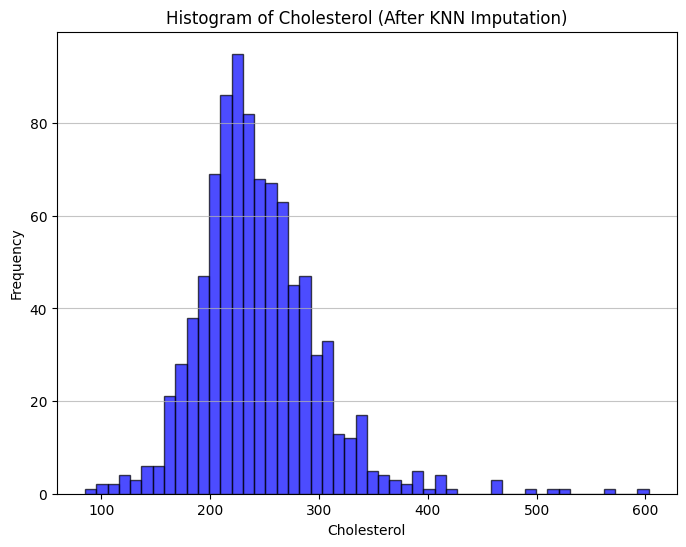

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler 
# Step 1: Standardize numerical features
numerical_features = ['Age', 'RestingBP', 'MaxHR', 'Oldpeak']
# numerical_features = ['Age', 'RestingBP', 'MaxHR', 'Oldpeak']

scaler = StandardScaler()

df_scaled = df.copy()

df_scaled[numerical_features] = scaler.fit_transform(df[numerical_features])

# Step 2: Replace zero values in Cholesterol with NaN
df_scaled['Cholesterol'] = df_scaled['Cholesterol'].replace(0, float('nan'))

# Step 3: Apply KNN Imputer
knn_imputer = KNNImputer(n_neighbors=3)  # Using 3 neighbors for imputation
data_imputed = knn_imputer.fit_transform(df_scaled)

# Step 4: Restore Cholesterol to the dataset
data_imputed = pd.DataFrame(data_imputed, columns=df.columns)
df['Cholesterol'] = data_imputed['Cholesterol']

# Step 5: Undo standardization for interpretability
# df[numerical_features] = scaler.inverse_transform(df[numerical_features])

# Plot the histogram for the imputed Cholesterol column
plt.figure(figsize=(8, 6))
plt.hist(df['Cholesterol'], bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of Cholesterol (After KNN Imputation)')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

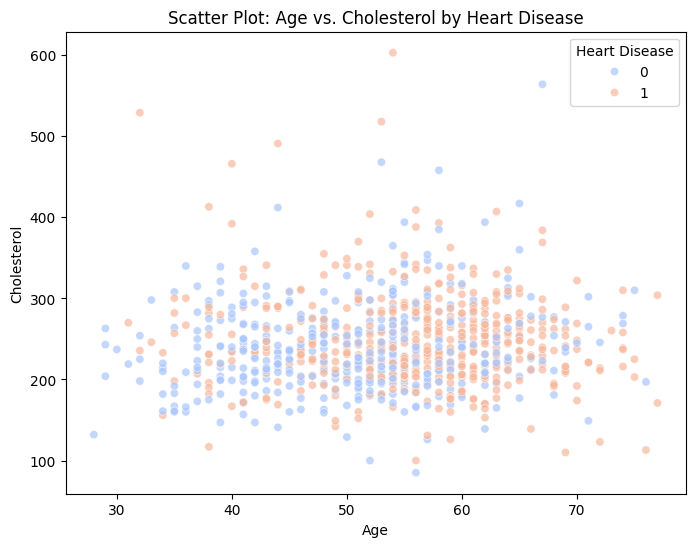

In [16]:

# Scatter plot of Age vs. Cholesterol colored by HeartDisease
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Cholesterol', hue='HeartDisease', palette='coolwarm', alpha=0.7)
plt.title('Scatter Plot: Age vs. Cholesterol by Heart Disease')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(title='Heart Disease')
plt.show()

In [17]:
conti_columns = list(summary[summary["Unique Values"]>3]["Column"])
conti_columns

for col in conti_columns:
    print(col + " Num Zeros:", sum(df[col] == 0))

Age Num Zeros: 0
RestingBP Num Zeros: 1
Cholesterol Num Zeros: 0
MaxHR Num Zeros: 0
Oldpeak Num Zeros: 368


In [18]:
df = df[df['RestingBP'] != 0]

for col in conti_columns:
    print(col + "Num Zeros:", sum(df[col] == 0))

AgeNum Zeros: 0
RestingBPNum Zeros: 0
CholesterolNum Zeros: 0
MaxHRNum Zeros: 0
OldpeakNum Zeros: 368


### Save File

In [19]:
df = df.drop("ChestPainType_ASY",axis=1)
df = df.drop("RestingECG_Normal",axis=1)
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_ST,MissingCholesterolNum
0,40,0,140,289.0,0,172,0,0.0,0,0,1,0,0,0,0,0
1,49,1,160,180.0,0,156,0,1.0,1,1,0,1,0,0,0,0
2,37,0,130,283.0,0,98,0,0.0,0,0,1,0,0,0,1,0
3,48,1,138,214.0,0,108,1,1.5,1,1,0,0,0,0,0,0
4,54,0,150,195.0,0,122,0,0.0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,110,264.0,0,132,0,1.2,1,1,0,0,1,0,0,0
914,68,0,144,193.0,1,141,0,3.4,1,1,0,0,0,0,0,0
915,57,0,130,131.0,0,115,1,1.2,1,1,0,0,0,0,0,0
916,57,1,130,236.0,0,174,0,0.0,1,1,1,0,0,1,0,0


In [20]:
df.to_csv("clean_heart.csv",index=False)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 917 entries, 0 to 917
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    917 non-null    int64  
 1   Sex                    917 non-null    int64  
 2   RestingBP              917 non-null    int64  
 3   Cholesterol            917 non-null    float64
 4   FastingBS              917 non-null    int64  
 5   MaxHR                  917 non-null    int64  
 6   ExerciseAngina         917 non-null    int64  
 7   Oldpeak                917 non-null    float64
 8   ST_Slope               917 non-null    int64  
 9   HeartDisease           917 non-null    int64  
 10  ChestPainType_ATA      917 non-null    int64  
 11  ChestPainType_NAP      917 non-null    int64  
 12  ChestPainType_TA       917 non-null    int64  
 13  RestingECG_LVH         917 non-null    int64  
 14  RestingECG_ST          917 non-null    int64  
 15  MissingChol

In [22]:
summary = data_type_analysis(df)

In [23]:
summary

,Column,Type,Unique Values,NaN Count,Proportion Missing
0,Age,Integer,50,0,0.0
1,Sex,Integer,2,0,0.0
2,RestingBP,Integer,66,0,0.0
3,Cholesterol,Float,308,0,0.0
4,FastingBS,Integer,2,0,0.0
5,MaxHR,Integer,119,0,0.0
6,ExerciseAngina,Integer,2,0,0.0
7,Oldpeak,Float,53,0,0.0
8,ST_Slope,Integer,3,0,0.0
9,HeartDisease,Integer,2,0,0.0


## Statistical Test

In [24]:
summary = data_type_analysis(df)
summary

,Column,Type,Unique Values,NaN Count,Proportion Missing
0,Age,Integer,50,0,0.0
1,Sex,Integer,2,0,0.0
2,RestingBP,Integer,66,0,0.0
3,Cholesterol,Float,308,0,0.0
4,FastingBS,Integer,2,0,0.0
5,MaxHR,Integer,119,0,0.0
6,ExerciseAngina,Integer,2,0,0.0
7,Oldpeak,Float,53,0,0.0
8,ST_Slope,Integer,3,0,0.0
9,HeartDisease,Integer,2,0,0.0


In [25]:
binary_columns = list(summary[summary["Unique Values"] == 2]["Column"])

for col in binary_columns:
    # print(col)
    print(col)

print(len(binary_columns))


Sex
FastingBS
ExerciseAngina
HeartDisease
ChestPainType_ATA
ChestPainType_NAP
ChestPainType_TA
RestingECG_LVH
RestingECG_ST
MissingCholesterolNum
10


p = proportion of heart disease
p0 =  proportion of label 0 that have heart disease
p1 =  proportion of label 1 that have heart disease

H0: p0 = p1


In [26]:
from statsmodels.stats.proportion import proportions_ztest

def proportion_df_test(group,label,df, alternative="two-sided"):
    group1 = df[df[group] == 1] # True True Fase
    group0 = df[df[group] == 0]

    successes = [sum(group0[label]) , sum(group1[label])]
    n_trials = [len(group0),len(group1)]

    # Perform the two-proportion z-test
    stat, p_value = proportions_ztest(successes, n_trials,alternative=alternative)

    # # Results
    # print(f"Z-statistic: {stat:.4f}")
    # print(f"P-value: {p_value:.10f}")

    # # Interpretation
    # alpha = 0.05
    # if p_value < alpha:
    #     print("Reject the null hypothesis: There is a significant difference between the proportions.")
    # else:
    #     print("Fail to reject the null hypothesis: No significant difference between the proportions.")
    estimator = sum(group0[label])/len(group0[label]) - sum(group1[label])/len(group0[label])

    return stat, p_value, estimator

In [27]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

def proportion_df_test(group, label, df, alternative="two-sided"):
    group1 = df[df[group] == 1]  # Group where the feature is 1
    group0 = df[df[group] == 0]  # Group where the feature is 0

    # Number of successes and trials
    successes = [sum(group0[label]), sum(group1[label])]
    n_trials = [len(group0), len(group1)]

    # Perform the two-proportion z-test
    stat, p_value = proportions_ztest(successes, n_trials, alternative=alternative)

    # Estimator: difference in proportions
    p_hat0 = sum(group0[label]) / len(group0)  # Proportion for group0
    p_hat1 = sum(group1[label]) / len(group1)  # Proportion for group1
    estimator = p_hat0 - p_hat1  # Difference in proportions

    # Standard error for the difference in proportions
    se = np.sqrt((p_hat0 * (1 - p_hat0)) / len(group0) + (p_hat1 * (1 - p_hat1)) / len(group1))

    # 95% Confidence Interval for the difference in proportions
    z = 1.96  # Z-score for 95% confidence
    lower_ci = estimator - z * se
    upper_ci = estimator + z * se

    return stat, p_value, estimator, lower_ci, upper_ci, p_hat0, p_hat1


In [28]:

label  = "HeartDisease"

binary_columns = [col for col in binary_columns if col != label]

# print(binary_columns)

stats = []
p_values = []
reject_h0s = []
estimators = []
lower_cis = []
upper_cis = []
p_hat0s = []
p_hat1s = []
for col in binary_columns:
    stat, p_value, estimator, lower_ci, upper_ci, p_hat0, p_hat1 =  proportion_df_test(col,label,df)
    reject_h0 = p_value < 0.05
    reject_h0s.append(reject_h0)
    stats.append(stat)
    p_values.append(p_value)
    estimators.append(estimator)
    lower_cis.append(lower_ci)
    upper_cis.append(upper_ci)
    p_hat0s.append(p_hat0)
    p_hat1s.append(p_hat1)


df_proportion_test = pd.DataFrame({
    "Group":  binary_columns,
    "stat": stats,
    "p_value": p_values,
    "reject_h0": reject_h0s,
    "estimator": estimators,
    "lower_ci": lower_cis,
    "upper_ci": upper_cis,
    "p_hat0": p_hat0s,
    "p_hat1": p_hat1s,
})

df_proportion_test


,Group,stat,p_value,reject_h0,estimator,lower_ci,upper_ci,p_hat0,p_hat1
0,Sex,9.239586,2.474525e-20,True,0.372148,0.301043,0.443253,0.631215,0.259067
1,FastingBS,-8.115387,4.842382e-16,True,-0.315018,-0.380561,-0.249475,0.479374,0.794393
2,ExerciseAngina,-15.004436,6.867257e-51,True,-0.501935,-0.555859,-0.448011,0.349817,0.851752
3,ChestPainType_ATA,12.163665,4.853163e-34,True,0.510465,0.448585,0.572345,0.649194,0.138728
4,ChestPainType_NAP,6.520042,7.028779e-11,True,0.258305,0.183382,0.333228,0.609790,0.351485
5,ChestPainType_TA,1.653120,9.830636e-02,False,0.124345,-0.022660,0.271349,0.559127,0.434783
6,RestingECG_LVH,-0.338367,7.350868e-01,False,-0.013761,-0.093319,0.065797,0.550069,0.563830
7,RestingECG_ST,-3.121063,1.801993e-03,True,-0.129563,-0.208030,-0.051096,0.527740,0.657303
8,MissingCholesterolNum,-9.627188,6.138630e-22,True,-0.405829,-0.465870,-0.345788,0.477212,0.883041


# Modeling

In [29]:
summary

continuous_cols = list(summary[summary["Unique Values"] > 3]["Column"])
categorical_cols = list(summary[summary["Unique Values"] <= 3]["Column"])
categorical_cols

['Sex',
 'FastingBS',
 'ExerciseAngina',
 'ST_Slope',
 'HeartDisease',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'RestingECG_LVH',
 'RestingECG_ST',
 'MissingCholesterolNum']

### VIF

In [30]:
df = pd.read_csv("clean_heart.csv")



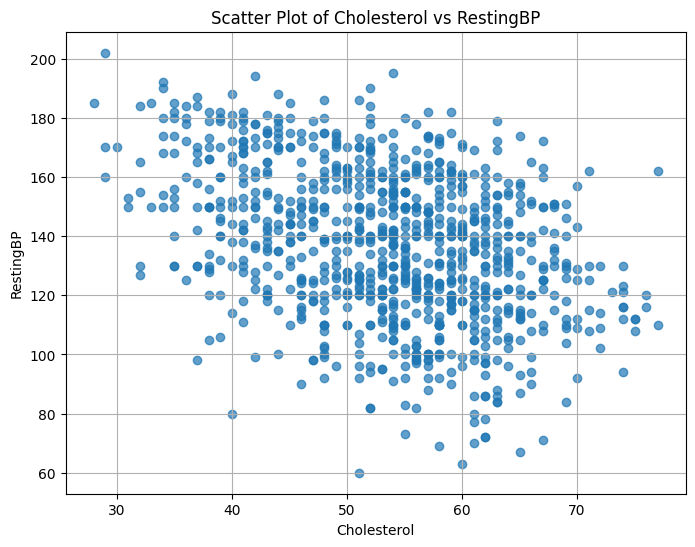

In [31]:
import matplotlib.pyplot as plt

# Assuming df contains the columns 'Cholesterol' and 'RestingBP'
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['MaxHR'], alpha=0.7)
plt.title('Scatter Plot of Cholesterol vs RestingBP')
plt.xlabel('Cholesterol')
plt.ylabel('RestingBP')
plt.grid(True)
plt.show()



In [32]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame and it includes the columns you want to apply PCA to
# Select the features you want to apply PCA to (e.g., Age, RestingBP, Cholesterol, MaxHR, etc.)
features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR']

# Create a new DataFrame with only the selected features
df_selected = df[features]

# Step 1: Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# Step 2: Apply PCA
pca = PCA(n_components=len(features))  # You can specify the number of components here
df_pca = pca.fit_transform(df_scaled)

# Step 3: Create a new DataFrame with the principal components
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])

# Step 4: Drop the original columns from the DataFrame
df_new = df.drop(columns=features)

# Step 5: Concatenate the PCA components with the original DataFrame (excluding the original features)
df_new = pd.concat([df_new, df_pca], axis=1)

# Show the new DataFrame
print(df_new.head())


   Sex  FastingBS  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  \
0    0          0               0      0.0         0             0   
1    1          0               0      1.0         1             1   
2    0          0               0      0.0         0             0   
3    1          0               1      1.5         1             1   
4    0          0               0      0.0         0             0   

   ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  RestingECG_LVH  \
0                  1                  0                 0               0   
1                  0                  1                 0               0   
2                  1                  0                 0               0   
3                  0                  0                 0               0   
4                  0                  1                 0               0   

   RestingECG_ST  MissingCholesterolNum       PC1       PC2       PC3  \
0              0                      0 -1.

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.read_csv("clean_heart.csv")

# Define the feature matrix (X) and target variable (y)
X = df.drop('HeartDisease', axis=1)  # Exclude target variable
y = df['HeartDisease']

# X['Constant'] = 1


df_temp = X
vif_data = pd.DataFrame()
vif_data["Feature"] = df_temp.columns
vif_data["VIF"] = [variance_inflation_factor(df_temp.values, i) for i in range(df_temp.shape[1])]

# Sort vif_data by VIF in descending order
vif_data_sorted = vif_data.sort_values(by='VIF', ascending=False)

# Display the sorted DataFrame
print(vif_data_sorted)

                  Feature        VIF
2               RestingBP  48.683078
0                     Age  33.926146
5                   MaxHR  24.624629
3             Cholesterol  19.600627
8                ST_Slope   3.357979
6          ExerciseAngina   2.607138
7                 Oldpeak   2.547320
9       ChestPainType_ATA   1.840213
10      ChestPainType_NAP   1.625341
14  MissingCholesterolNum   1.539673
4               FastingBS   1.531498
12         RestingECG_LVH   1.456012
1                     Sex   1.400339
13          RestingECG_ST   1.397262
11       ChestPainType_TA   1.183106


In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.read_csv("clean_heart.csv")

# Define the feature matrix (X) and target variable (y)
X = df_new.drop('HeartDisease', axis=1)  # Exclude target variable
y = df_new['HeartDisease']

# X['Constant'] = 1


df_temp = X
vif_data = pd.DataFrame()
vif_data["Feature"] = df_temp.columns
vif_data["VIF"] = [variance_inflation_factor(df_temp.values, i) for i in range(df_temp.shape[1])]

# print(vif_data)

# Sort vif_data by VIF in descending order
vif_data_sorted = vif_data.sort_values(by='VIF', ascending=False)

# Display the sorted DataFrame
print(vif_data_sorted)

                  Feature       VIF
4                ST_Slope  3.146648
3                 Oldpeak  2.505602
2          ExerciseAngina  2.285387
1               FastingBS  1.501393
10  MissingCholesterolNum  1.490438
8          RestingECG_LVH  1.371167
9           RestingECG_ST  1.333397
0                     Sex  1.308819
5       ChestPainType_ATA  1.275813
6       ChestPainType_NAP  1.269164
11                    PC1  1.253974
7        ChestPainType_TA  1.111809
14                    PC4  1.111457
13                    PC3  1.098807
12                    PC2  1.071202


### Mutual Information

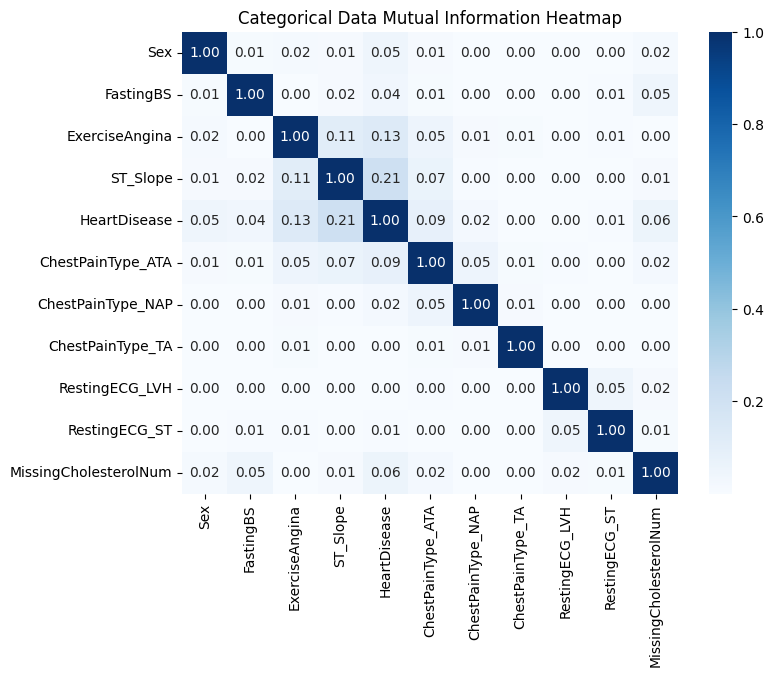

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

# Sample DataFrame with categorical data

# Function to calculate mutual information matrix for specified categorical columns
def calculate_categorical_mutual_info(df, columns):
    n = len(columns)
    mi_matrix = np.zeros((n, n))
    
    # Iterate over all pairs of selected columns
    for i in range(n):
        for j in range(n):
            if i == j:
                mi_matrix[i, j] = 1  # Perfect mutual information with itself
            else:
                mi_matrix[i, j] = mutual_info_classif(
                    df[[columns[i]]], df[columns[j]], discrete_features=True
                )[0]
    return mi_matrix

# Calculate mutual information matrix for the selected columns
mi_matrix = calculate_categorical_mutual_info(df, categorical_cols)

# Convert matrix to DataFrame for better labeling
mi_df = pd.DataFrame(mi_matrix, index=categorical_cols, columns=categorical_cols)

# Plot heat map
plt.figure(figsize=(8, 6))
sns.heatmap(mi_df, annot=True, cmap="Blues", fmt=".2f", cbar=True)
plt.title("Categorical Data Mutual Information Heatmap")
plt.show()


In [36]:
contingency_table = pd.crosstab(df['MissingCholesterolNum'], df['HeartDisease'])

# Display the table
print(contingency_table)

HeartDisease             0    1
MissingCholesterolNum          
0                      390  356
1                       20  151


# SAVE

In [37]:
df_new.to_csv("clean_heart_pca.csv",index=False)